In [223]:
#Import needed libraries
import os
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base

In [224]:
xls = pd.ExcelFile('electric_vehicle_data.xlsx') #specify the workbook I want parsed.
xls.sheet_names #print sheetnames so I know it's working.

['6-9 to 6-13',
 '6-16 to 6-20',
 '6-23 to 6-27',
 '6-30 to 7-4',
 '7-9 to 7-11',
 '7-14 to 7-18',
 '7-21 to 7-25',
 '7-28 to 8-1',
 '8-4 to 8-8']

In [225]:
ev_df = pd.DataFrame()
print(type(frame_1))
for s in xls.sheet_names:
    print(s)
    ev_df = ev_df.append(pd.read_excel('electric_vehicle_data.xlsx', sheet_name=s), sort=False)
    ev_df.head(2)
    

<class 'pandas.core.frame.DataFrame'>
6-9 to 6-13
6-16 to 6-20
6-23 to 6-27
6-30 to 7-4
7-9 to 7-11
7-14 to 7-18
7-21 to 7-25
7-28 to 8-1
8-4 to 8-8


In [226]:
frame_1.to_csv("vehicles.csv")

from sqlalchemy_utils import create_database, database_exists, drop_database
rds_connection_string = "postgresql://<user>:<password>@localhost:5432/ev_test_db"
engine = create_engine(rds_connection_string)

if database_exists(engine.url):
    # Delete PostgreSQL database
    drop_database(engine.url)
    # Create empty PostgreSQL database
    create_database(engine.url)
    print("after create")
else:
    print("2nd")
    create_database(engine.url)


after create


In [227]:
ev_df.to_sql('scooter_schema', engine)
columns = ev_df.columns.values

In [228]:
filter_query = 'select * from scooter_schema where "Last Inspected" < 31 AND ("Front PSI" > 12 OR "Rear PSI" > 12)'
result=engine.execute(filter_query).fetchall()

In [229]:
clean_ev_df = pd.DataFrame(result, columns=r)
clean_ev_df.sort_values(by=["Last Inspected"], inplace=True)

In [230]:
clean_ev_df.drop(["Date", "Origin", "Ticket", "Vehicle ID", "Ticket Sub-1", "Ticket Sub-2", "Tire Style", "Front Pads", "Rear Pads"], axis=1, inplace=True)
print(clean_ev_df.head())


     event_id  Last Inspected  Front PSI  Rear PSI
69         81               0       30.0      29.0
201        48               0        0.0      28.0
36         44               0       33.0      33.0
396        46               0       32.0      29.0
223        75               0       28.0      28.0


In [231]:
x_axis = clean_ev_df["Last Inspected"]
y_axis_1 = clean_ev_df["Front PSI"]
y_axis_2 = clean_ev_df["Rear PSI"]

In [232]:
x_axis = np.arange(0, 41, 1)
y_axis_1 = np.arange(5,35,1)
y_axis_1 = np.arange(5,35,1)


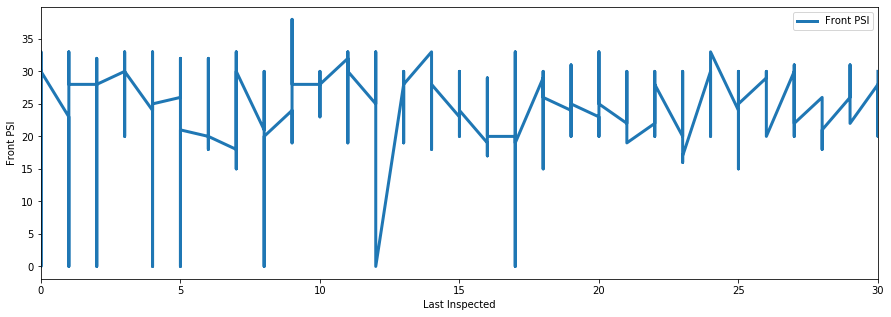

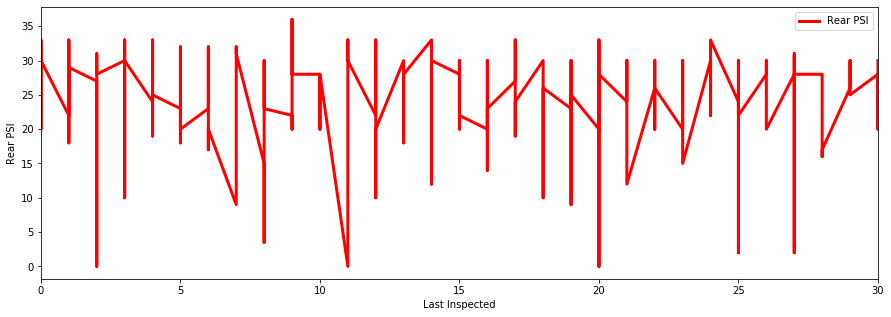

In [233]:
front_psi_plot = clean_ev_df.plot.line(x="Last Inspected", y="Front PSI", linewidth=3, figsize=(15,5)).set_ylabel("Front PSI")
rear_psi_plot = clean_ev_df.plot.line(x="Last Inspected", y="Rear PSI", label="Rear PSI", color="red", linewidth=3, figsize=(15,5)).set_ylabel("Rear PSI")


In [234]:
front_psi_plot.get_figure().savefig("front_psi.png")

In [235]:
rear_psi_plot.get_figure().savefig("rear_psi.png")